Import Libraries

In [1]:
#Import pandas, numpy, matplotlib, seaborn,sklearn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



Import Data

In [2]:
#Import csv file
house = pd.read_csv('test_cleaned.csv')

Describe the data

In [3]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,61,0,0,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,298,0,0,0,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,0,42,0,0,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,0,35,272,0,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,192,84,0,0,WD,Normal,250000


In [4]:
#Drop columns that only have 1 feature
house.drop(columns=['Street', 'Utilities','Condition2'],axis=1,inplace=True)

In [5]:
house.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,TA,TA,Y,0,61,0,0,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,TA,TA,Y,298,0,0,0,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,TA,TA,Y,0,42,0,0,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,TA,TA,Y,0,35,272,0,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,TA,TA,Y,192,84,0,0,WD,Normal,250000


EDA

In [6]:
#Find out how many unique features there are in each column
unique=house.nunique()
column=['unique']
df=pd.DataFrame(unique,columns=column)
df.head()
df.sort_values(by='unique',ascending=False).head(25)

,unique
LotArea,1000
GrLivArea,822
BsmtUnfSF,764
1stFlrSF,727
TotalBsmtSF,700
BsmtFinSF1,621
SalePrice,620
GarageArea,435
2ndFlrSF,394
MasVnrArea,325


<AxesSubplot:>

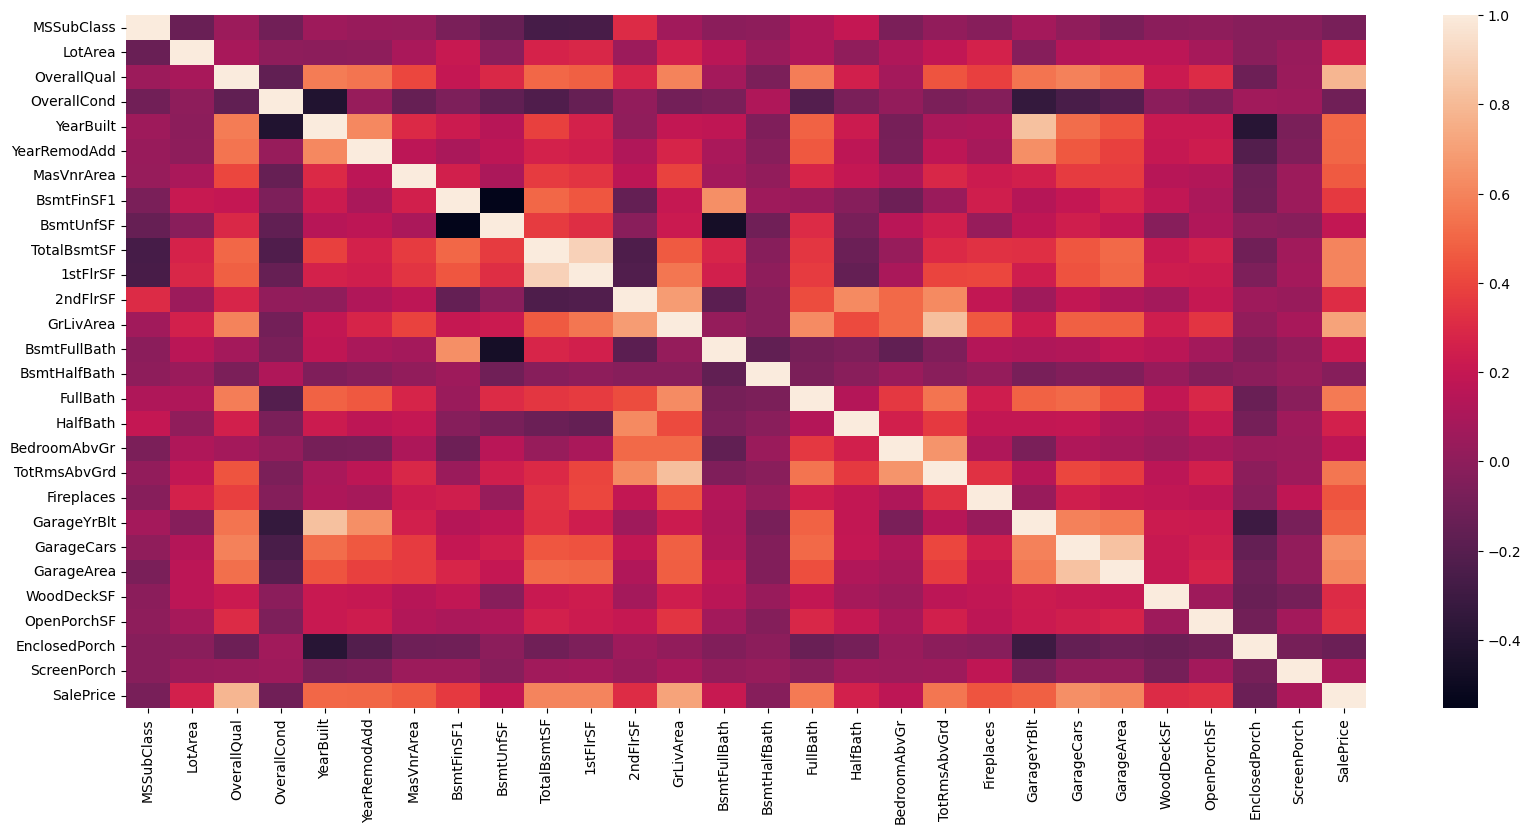

In [7]:
#Correlation heat map
corr = house.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   LotShape       1338 non-null   object 
 4   LandContour    1338 non-null   object 
 5   LotConfig      1338 non-null   object 
 6   LandSlope      1338 non-null   object 
 7   Neighborhood   1338 non-null   object 
 8   Condition1     1338 non-null   object 
 9   BldgType       1338 non-null   object 
 10  HouseStyle     1338 non-null   object 
 11  OverallQual    1338 non-null   int64  
 12  OverallCond    1338 non-null   int64  
 13  YearBuilt      1338 non-null   int64  
 14  YearRemodAdd   1338 non-null   int64  
 15  RoofStyle      1338 non-null   object 
 16  RoofMatl       1338 non-null   object 
 17  Exterior1st    1338 non-null   object 
 18  Exterior

C:\Users\abhik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

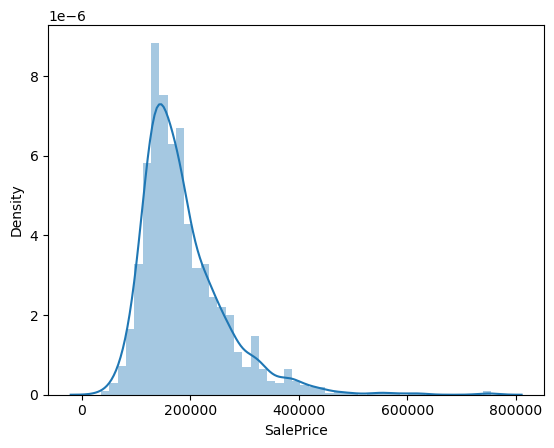

In [9]:
#Distribution of SalePrice column
sns.distplot(house['SalePrice'])

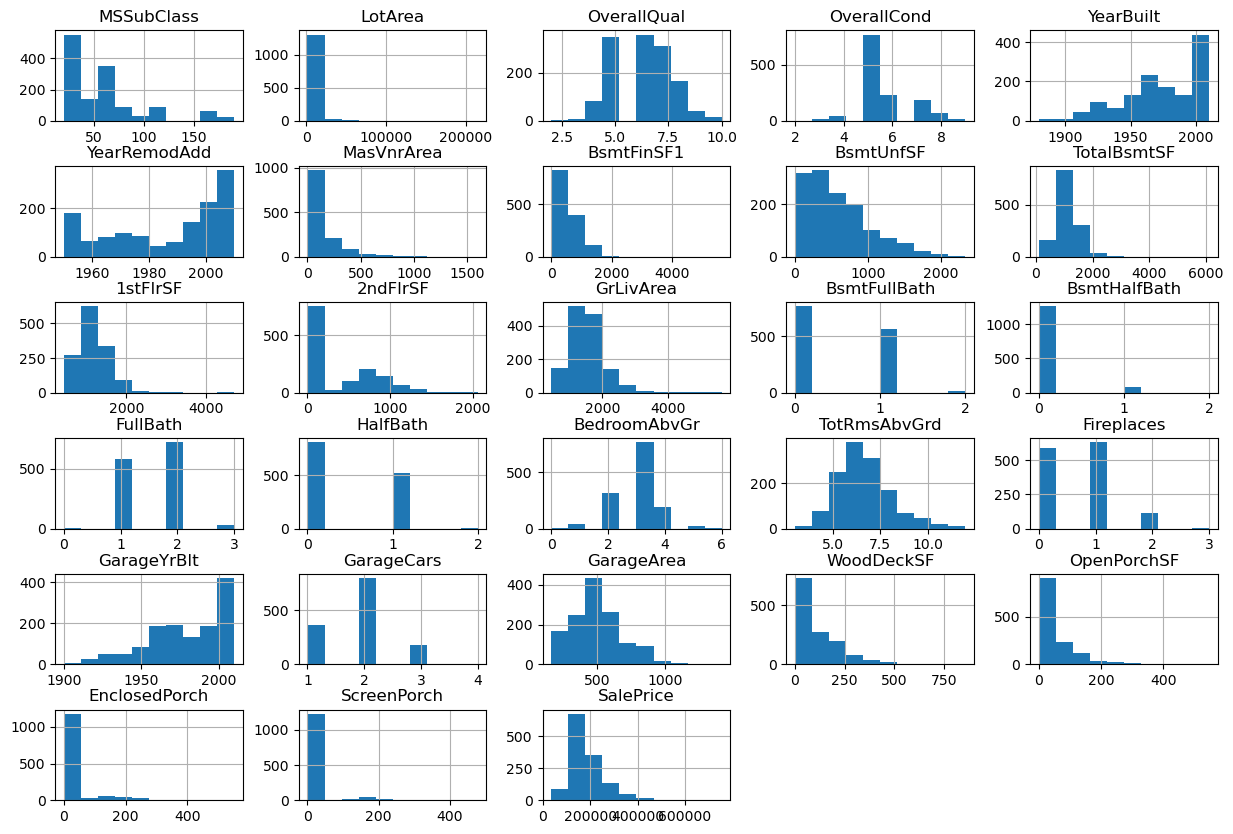

In [10]:
#Histograms of Quantitative columns
house.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [11]:
obj_db = house.select_dtypes(include=['object'])

In [12]:
obj_db.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [13]:
house.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,TA,TA,Y,0,61,0,0,WD,Normal,208500
1,20,RL,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,...,TA,TA,Y,298,0,0,0,WD,Normal,181500
2,60,RL,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,...,TA,TA,Y,0,42,0,0,WD,Normal,223500
3,70,RL,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,...,TA,TA,Y,0,35,272,0,WD,Abnorml,140000
4,60,RL,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,...,TA,TA,Y,192,84,0,0,WD,Normal,250000


In [14]:
#Table of number of unique Qualitative features
a=obj_db.nunique()
c=['unique']
obj_unique=pd.DataFrame(a,columns=c)
obj_unique.head()
obj_unique.sort_values(by='unique',ascending=False).head(25)

,unique
Neighborhood,25
Exterior2nd,16
Exterior1st,14
SaleType,9
Condition1,9
HouseStyle,8
RoofMatl,8
Functional,7
RoofStyle,6
SaleCondition,6


In [15]:
#Top Correlation Values
df_num_corr = house.corr()['SalePrice'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(golden_features_list)

OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
YearRemodAdd    0.501435
Name: SalePrice, dtype: float64


In [16]:
#New DataFrame that only include columns with high correlation to SalePrice and have similar distribution
house_model = house[['OverallQual','GrLivArea','GarageArea','1stFlrSF','TotalBsmtSF','TotRmsAbvGrd']].copy()

In [17]:
house_model.head()

,OverallQual,GrLivArea,GarageArea,1stFlrSF,TotalBsmtSF,TotRmsAbvGrd
0,7,1710,548,856,856,8
1,6,1262,460,1262,1262,6
2,7,1786,608,920,920,6
3,7,1717,642,961,756,7
4,8,2198,836,1145,1145,9


In [18]:
#Save the new file
house_model.to_csv('house_model.csv',index=False)